In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
Coke_Sales = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx' )

Coke_Sales.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
Coke_Sales1 = Coke_Sales.copy()

In [4]:
Coke_Sales1.shape

(42, 2)

In [5]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
Coke_Sales1['year'] = label.fit_transform(Coke_Sales1.Quarter)

In [6]:
Coke_Sales1.Quarter.value_counts()

Q1_86    1
Q4_93    1
Q4_91    1
Q1_92    1
Q2_92    1
Q3_92    1
Q4_92    1
Q1_93    1
Q2_93    1
Q3_93    1
Q1_94    1
Q2_86    1
Q2_94    1
Q3_94    1
Q4_94    1
Q1_95    1
Q2_95    1
Q3_95    1
Q4_95    1
Q1_96    1
Q3_91    1
Q2_91    1
Q1_91    1
Q4_90    1
Q3_86    1
Q4_86    1
Q1_87    1
Q2_87    1
Q3_87    1
Q4_87    1
Q1_88    1
Q2_88    1
Q3_88    1
Q4_88    1
Q1_89    1
Q2_89    1
Q3_89    1
Q4_89    1
Q1_90    1
Q2_90    1
Q3_90    1
Q2_96    1
Name: Quarter, dtype: int64

In [7]:
year = [ ]
month = [ ]

for i in Coke_Sales1['Quarter']:
  year.append('20' +i[3:])
  if i[:2] == 'Q1':
    month.append('Jan')
  elif  i[:2] == 'Q2':
    month.append('Feb')
  elif i[:2] == 'Q3':
    month.append('Mar')
  else :
    month.append('april')

Coke_Sales1['year'] = year
Coke_Sales1['month'] = month
Coke_Sales1['t'] = range(1, len(Coke_Sales1)+1)

Coke_Sales1.head()

,Quarter,Sales,year,month,t
0,Q1_86,1734.827000,2086,Jan,1
1,Q2_86,2244.960999,2086,Feb,2
2,Q3_86,2533.804993,2086,Mar,3
3,Q4_86,2154.962997,2086,april,4
4,Q1_87,1547.818996,2087,Jan,5


In [8]:
Coke_Sales1.shape

(42, 5)

In [9]:
Coke_Sales1.describe()

,Sales,t
count,42.000000,42.000000
mean,2994.353308,21.500000
std,977.930896,12.267844
min,1547.818996,1.000000
25%,2159.714247,11.250000
50%,2782.376999,21.500000
75%,3609.250000,31.750000
max,5253.000000,42.000000


In [10]:
Coke_Sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   year     42 non-null     object 
 3   month    42 non-null     object 
 4   t        42 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ KB


Forecasting ACF and PACF

<Figure size 1000x500 with 0 Axes>

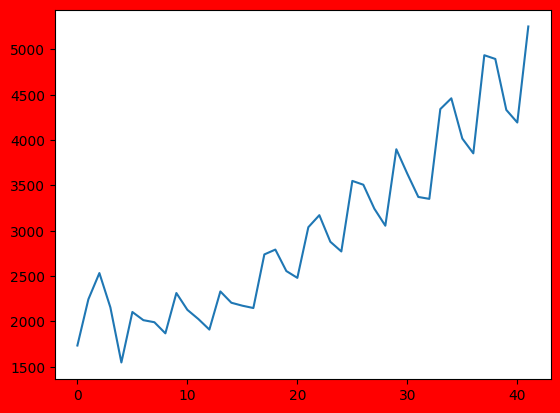

In [11]:
plt.figure(figsize=(10,5))
fig = plt.figure()
fig.patch.set_facecolor('red')
plt.plot(Coke_Sales1.Sales)

In [12]:
Coke_Sales1.isna().sum()

Quarter    0
Sales      0
year       0
month      0
t          0
dtype: int64

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

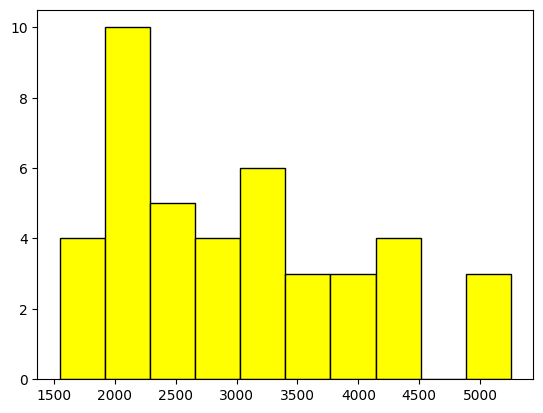

In [13]:
plt.hist(Coke_Sales1.Sales, color='yellow',edgecolor='black', bins=10)

In [14]:
acf_values = acf(Coke_Sales1['Sales'])
np.round(acf_values,2)

array([ 1.  ,  0.81,  0.73,  0.75,  0.74,  0.56,  0.48,  0.48,  0.45,
        0.3 ,  0.23,  0.23,  0.22,  0.08,  0.02,  0.01, -0.01])

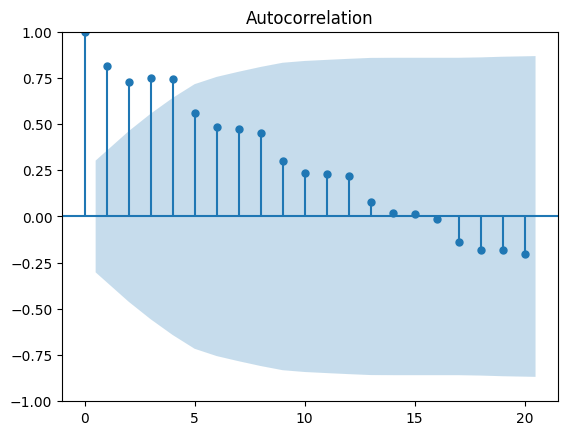

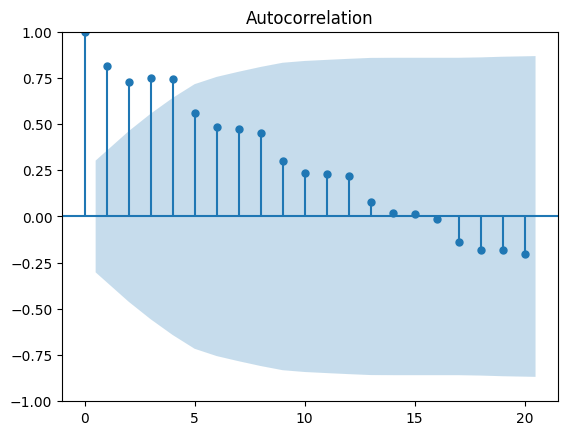

In [15]:
plot_acf(Coke_Sales1['Sales'], lags=20)

Partial autocorrelation function

In [16]:
pacf_values = pacf(Coke_Sales1['Sales'])
np.round(pacf_values,2)

array([ 1.  ,  0.83,  0.22,  0.43,  0.26, -0.57, -0.24, -0.12,  0.31,
       -0.06, -0.19, -0.16,  0.3 , -0.19, -0.39, -0.57,  0.07])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


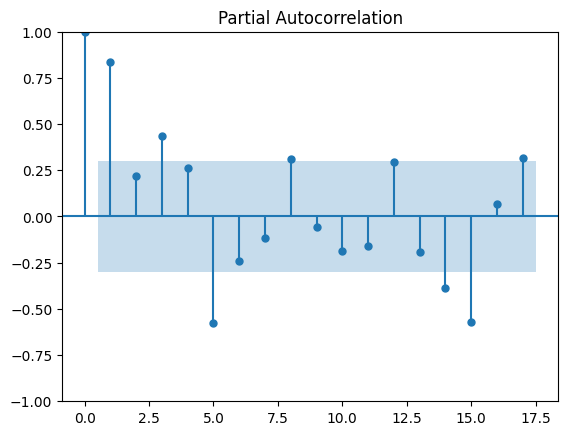

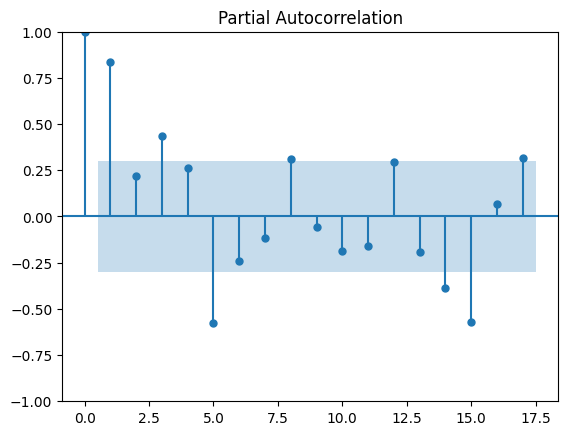

In [17]:
plot_pacf(Coke_Sales1['Sales'])

Forecasting Model Based Methods

<Axes: xlabel='year', ylabel='Sales'>

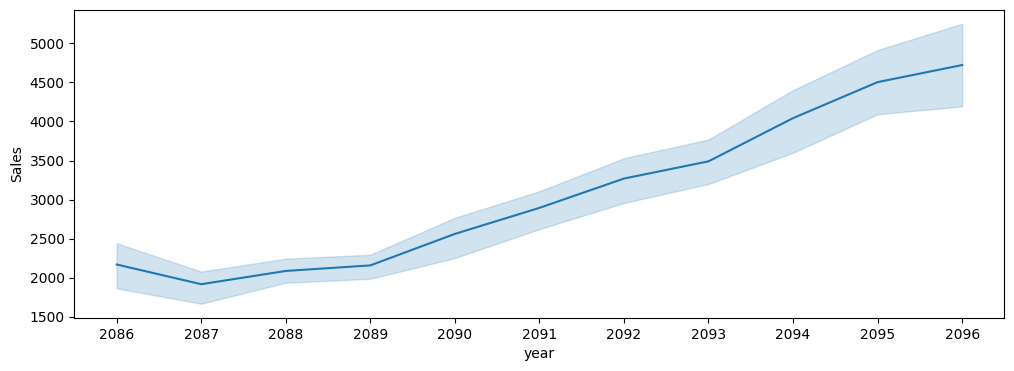

In [18]:
plt.figure(figsize=(12,4))
sns.lineplot(x='year', y='Sales', data=Coke_Sales1)

In [19]:
Coke_Sales1.head()

,Quarter,Sales,year,month,t
0,Q1_86,1734.827000,2086,Jan,1
1,Q2_86,2244.960999,2086,Feb,2
2,Q3_86,2533.804993,2086,Mar,3
3,Q4_86,2154.962997,2086,april,4
4,Q1_87,1547.818996,2087,Jan,5


In [20]:
#dummpies
Coke_Sales3 = Coke_Sales1.copy()
Coke_Sales3['log_sales'] = np.log(Coke_Sales3['Sales'])

In [21]:
Coke_Sales3.head()

,Quarter,Sales,year,month,t,log_sales
0,Q1_86,1734.827000,2086,Jan,1,7.458663
1,Q2_86,2244.960999,2086,Feb,2,7.716443
2,Q3_86,2533.804993,2086,Mar,3,7.837477
3,Q4_86,2154.962997,2086,april,4,7.675529
4,Q1_87,1547.818996,2087,Jan,5,7.344602


In [22]:
Coke_Sales3.shape

(42, 6)

In [23]:
Coke_Sales4 = Coke_Sales3.copy()
dummy = pd.get_dummies(Coke_Sales3.month)
Coke_Sales4 = pd.concat([Coke_Sales4,dummy],axis=1)

In [24]:
Coke_Sales4

,Quarter,Sales,year,month,t,log_sales,Feb,Jan,Mar,april
0,Q1_86,1734.827000,2086,Jan,1,7.458663,0,1,0,0
1,Q2_86,2244.960999,2086,Feb,2,7.716443,1,0,0,0
2,Q3_86,2533.804993,2086,Mar,3,7.837477,0,0,1,0
3,Q4_86,2154.962997,2086,april,4,7.675529,0,0,0,1
4,Q1_87,1547.818996,2087,Jan,5,7.344602,0,1,0,0
5,Q2_87,2104.411995,2087,Feb,6,7.651791,1,0,0,0
6,Q3_87,2014.362999,2087,Mar,7,7.608058,0,0,1,0
7,Q4_87,1991.746998,2087,april,8,7.596767,0,0,0,1
8,Q1_88,1869.049999,2088,Jan,9,7.533186,0,1,0,0
9,Q2_88,2313.631996,2088,Feb,10,7.746574,1,0,0,0


In [25]:
Coke_Sales4 = Coke_Sales4.drop('month',axis=1)

In [26]:
Coke_Sales4['t_squared'] = Coke_Sales4['t']**2
Coke_Sales4

,Quarter,Sales,year,t,log_sales,Feb,Jan,Mar,april,t_squared
0,Q1_86,1734.827000,2086,1,7.458663,0,1,0,0,1
1,Q2_86,2244.960999,2086,2,7.716443,1,0,0,0,4
2,Q3_86,2533.804993,2086,3,7.837477,0,0,1,0,9
3,Q4_86,2154.962997,2086,4,7.675529,0,0,0,1,16
4,Q1_87,1547.818996,2087,5,7.344602,0,1,0,0,25
5,Q2_87,2104.411995,2087,6,7.651791,1,0,0,0,36
6,Q3_87,2014.362999,2087,7,7.608058,0,0,1,0,49
7,Q4_87,1991.746998,2087,8,7.596767,0,0,0,1,64
8,Q1_88,1869.049999,2088,9,7.533186,0,1,0,0,81
9,Q2_88,2313.631996,2088,10,7.746574,1,0,0,0,100


In [27]:
train = Coke_Sales4.head(30)
test = Coke_Sales4.head(12)

In [28]:
train

,Quarter,Sales,year,t,log_sales,Feb,Jan,Mar,april,t_squared
0,Q1_86,1734.827000,2086,1,7.458663,0,1,0,0,1
1,Q2_86,2244.960999,2086,2,7.716443,1,0,0,0,4
2,Q3_86,2533.804993,2086,3,7.837477,0,0,1,0,9
3,Q4_86,2154.962997,2086,4,7.675529,0,0,0,1,16
4,Q1_87,1547.818996,2087,5,7.344602,0,1,0,0,25
5,Q2_87,2104.411995,2087,6,7.651791,1,0,0,0,36
6,Q3_87,2014.362999,2087,7,7.608058,0,0,1,0,49
7,Q4_87,1991.746998,2087,8,7.596767,0,0,0,1,64
8,Q1_88,1869.049999,2088,9,7.533186,0,1,0,0,81
9,Q2_88,2313.631996,2088,10,7.746574,1,0,0,0,100


In [29]:
test

,Quarter,Sales,year,t,log_sales,Feb,Jan,Mar,april,t_squared
0,Q1_86,1734.827000,2086,1,7.458663,0,1,0,0,1
1,Q2_86,2244.960999,2086,2,7.716443,1,0,0,0,4
2,Q3_86,2533.804993,2086,3,7.837477,0,0,1,0,9
3,Q4_86,2154.962997,2086,4,7.675529,0,0,0,1,16
4,Q1_87,1547.818996,2087,5,7.344602,0,1,0,0,25
5,Q2_87,2104.411995,2087,6,7.651791,1,0,0,0,36
6,Q3_87,2014.362999,2087,7,7.608058,0,0,1,0,49
7,Q4_87,1991.746998,2087,8,7.596767,0,0,0,1,64
8,Q1_88,1869.049999,2088,9,7.533186,0,1,0,0,81
9,Q2_88,2313.631996,2088,10,7.746574,1,0,0,0,100


Linear Model

In [36]:
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf


linear_model = smf.ols('Sales~t', data=Coke_Sales4).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Sales'],pred_linear))
rmse_linear

386.75379400675007

Exponential Model

In [37]:
exp = smf.ols('log_sales~t', data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Sales'],pred_exp))
rmse_exp

2063.008610220235

Quadratic Model

In [32]:
quad = smf.ols('Sales~t+t_squared', data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = np.sqrt(mean_squared_error(test['Sales'], pred_quad))
rmse_quad

250.5859434677298

Additive Seasonality Model

In [33]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+april', data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','april']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea))
rmse_add_sea

477.1400470733928

Additive Seasonality Quadratic Model

In [34]:
add_sea_quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+april', data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t_squared','Jan','Feb','Mar','april']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

147.24871220010834

Multiplicative Seasonality

In [35]:
mul_sea = smf.ols('log_sales~Jan+Feb+Mar+april',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[['Jan','Feb','Mar','april']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['Sales'],pred_mul_sea))
rmse_mul_sea

2062.8054686626397

Compare The Results

In [39]:
data = {'MODEL':pd.Series(['rmse_linear', 'rmse_exp', 'rmse_quad', 'rmse_add_Sea', 'rmse_add_sea_quad','rmse_mul_sea']),
         "RMSE_Values":pd.Series([rmse_linear, rmse_exp, rmse_quad, rmse_add_sea, rmse_add_sea_quad, rmse_mul_sea])}

table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,147.248712
2,rmse_quad,250.585943
0,rmse_linear,386.753794
3,rmse_add_Sea,477.140047
5,rmse_mul_sea,2062.805469
1,rmse_exp,2063.008610


FINAL  MODEL

In [95]:
final_model = smf.ols('Sales~+t+t_squared+Jan+Feb+Mar+april',data=train).fit()
pred_final = pd.Series(final_model.predict(train[['t','t_squared','Jan','Feb','Mar','april']]))
rmse_final_model = np.sqrt(mean_squared_error(train['Sales'],pred_final))
rmse_final_model

123.67009767036055

In [97]:
pred_df = pd.DataFrame({' ACTUAL' :  train.Sales, ' PREDICTED ' : pred_final})

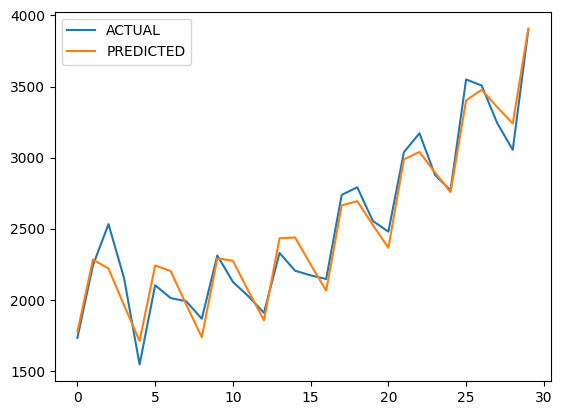

In [98]:
plt.plot( train['Sales'], label = 'ACTUAL')
plt.plot( pred_df[' PREDICTED '], label = 'PREDICTED')
plt.legend()

In [87]:
pred_linear

0     1492.151553
1     1565.429688
2     1638.707822
3     1711.985956
4     1785.264091
5     1858.542225
6     1931.820359
7     2005.098494
8     2078.376628
9     2151.654763
10    2224.932897
11    2298.211031
dtype: float64

In [89]:
test.Sales

0     1734.827000
1     2244.960999
2     2533.804993
3     2154.962997
4     1547.818996
5     2104.411995
6     2014.362999
7     1991.746998
8     1869.049999
9     2313.631996
10    2128.320000
11    2026.828999
Name: Sales, dtype: float64